<a id='top'></a>
## Título: Análise exploratória mortalidade neonatal Brasil 2006-2016.
#### Autor: Carlos Eduardo Beluzo
#### Data: Julho/2020


Dataset

* [Dataset pre processing](#Dataset_pre_processing)
* [Descriptive tables](#Descriptive_tables)
* [Data exploratory plots](#Data_exploratory_plots)
* [Samples size per Year](#Samples_size_per_Year)
* [Samples size per Year (neonatal deaths)](#Samples_size_per_Year_neonatal)
* [Deaths distibuiton per days](#Deaths_distibuiton_per_days)
* [Deaths distibuiton per weeks](#Deaths_distibuiton_per_weeks)


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

<a id='Dataset_pre_processing'></a>
### Dataset pre processing
[Home](#top)

In [ ]:
df = pd.read_csv("/Users/carlosbeluzo/dataset/SIVEP/AC_07_19.csv", sep=",", low_memory=False)
df.to_pickle("data/AC_07_19.pkl")
print(df.shape)
del df

df = pd.read_csv("/Users/carlosbeluzo/dataset/SIVEP/AM_07_19.csv", sep=",", low_memory=False)
df.to_pickle("data/AM_07_19.pkl")
print(df.shape)
del df

df = pd.read_csv("/Users/carlosbeluzo/dataset/SIVEP/AP_07_19.csv", sep=",", low_memory=False)
df.to_pickle("data/AP_07_19.pkl")
print(df.shape)
del df

df = pd.read_csv("/Users/carlosbeluzo/dataset/SIVEP/MA_07_19.csv", sep=",", low_memory=False)
df.to_pickle("data/MA_07_19.pkl")
print(df.shape)
del df

df = pd.read_csv("/Users/carlosbeluzo/dataset/SIVEP/MT_07_19.csv", sep=",", low_memory=False)
df.to_pickle("data/MT_07_19.pkl")
print(df.shape)
del df

df = pd.read_csv("/Users/carlosbeluzo/dataset/SIVEP/PA_07_19.csv", sep=",", low_memory=False)
df.to_pickle("data/PA_07_19.pkl")
print(df.shape)
del df

df = pd.read_csv("/Users/carlosbeluzo/dataset/SIVEP/RO_07_19.csv", sep=",", low_memory=False)
df.to_pickle("data/RO_07_19.pkl")
print(df.shape)
del df

df = pd.read_csv("/Users/carlosbeluzo/dataset/SIVEP/RR_07_19.csv", sep=",", low_memory=False)
df.to_pickle("data/RR_07_19.pkl")
print(df.shape)
del df

df = pd.read_csv("/Users/carlosbeluzo/dataset/SIVEP/TO_07_19.csv", sep=",", low_memory=False)
df.to_pickle("data/TO_07_19.pkl")
print(df.shape)
del df

(5514403, 47)
(12254215, 47)
(1092884, 47)
(880273, 47)
(219531, 47)
(4996788, 47)
(2550362, 47)
(1888541, 47)
(17409, 47)


In [ ]:
dfTotal = pd.read_pickle("data/AC_07_19.pkl")

ufs= ['AM_07_19.pkl', 'AP_07_19.pkl', 'MA_07_19.pkl', 'MT_07_19.pkl','PA_07_19.pkl','RO_07_19.pkl', 'RR_07_19.pkl', 'TO_07_19.pkl']

for uf in ufs:
    dfTotal = dfTotal.append(pd.read_pickle("data/%s" % uf), ignore_index = True)

dfTotal.shape

(29414406, 47)

In [ ]:
df = dfTotal # pd.read_pickle("data/TO_07_19.pkl")
dfNegative = df[df['RES_EXAM'] == 1]
dfPositive = df[df['RES_EXAM'] != 1]
print("Dataset size: ", df.shape[0])
print("dfPositive: ", dfPositive.shape[0])
print("dfNegative: ", dfNegative.shape[0])
print("Columns: ", df.shape[1])
df.columns

Dataset size:  29414406
dfPositive:  3677019
dfNegative:  25737387
Columns:  47


Index(['COD_AGEN', 'COD_NOTI', 'COD_OCUP', 'COD_UNIN', 'DT_DIGIT', 'DT_ENVLO',
       'DT_EXAME', 'DT_NASCI', 'DT_NOTIF', 'DT_SINTO', 'DT_TRATA', 'ESQUEMA',
       'ESQUEMA_1', 'EXAME', 'EXAMINADOR', 'FALCIPARUM', 'GESTANTE',
       'GESTANTE1', 'HEMOPARASI', 'ID_DIMEA', 'ID_LVC', 'ID_PACIE', 'LOC_INFE',
       'LOC_RESI', 'MUN_INFE', 'MUN_NOTI', 'MUN_RESI', 'NIV_ESCO',
       'NIV_ESCO_1', 'PAIS_INF', 'PAIS_RES', 'QTD_CRUZ', 'QTD_PARA', 'RACA',
       'RES_EXAM', 'SEM_NOTI', 'SEXO', 'SINTOMAS', 'TIPO_LAM', 'UF_INFEC',
       'UF_NOTIF', 'UF_RESID', 'VIVAX', 'date_notif', 'day_notif',
       'month_notif', 'year_notif'],
      dtype='object')

### Dataset original data distribuition between classes Positives and Negatives


Original dataset contains  999  individuals of class "positive" ( 99.9 %), and 999  individuas of class "Negative" ( 0.6 %). It comprises data from  2006  to  2016


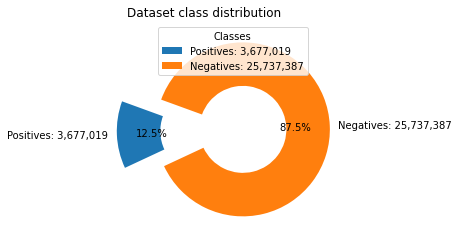

In [ ]:
positives = 'Positives: ' + str('{:,}'.format(dfPositive.shape[0]))
negatives = 'Negatives: ' + str('{:,}'.format(dfNegative.shape[0]))

dfPlot = pd.DataFrame({'': [dfPositive.shape[0], dfNegative.shape[0]]}, index=[positives, negatives])

ax = dfPlot.plot.pie(y='', figsize=(4, 4), title='Dataset class distribution',
                     explode=[0,.45], startangle=160, radius=1,
                     wedgeprops=dict(width=0.5), autopct='%1.1f%%')

ax.legend(title="Classes", loc="best")

plt.savefig("img/original_dataset_class_distr.pdf", dpi=300, bbox_inches='tight', pad_inches=0.5)

print('Original dataset contains ', dfPositive.shape[0],
      ' individuals of class "positive" (', dfPositive.shape[0]/df.shape[0], '%), and',
      dfNegative.shape[0], ' individuas of class "Negative" (',dfNegative.shape[0]/df.shape[0],
      '%). It comprises data from ', 2006, ' to ',2016)

del dfPlot

### Count percentege of null values


Describe nulls....


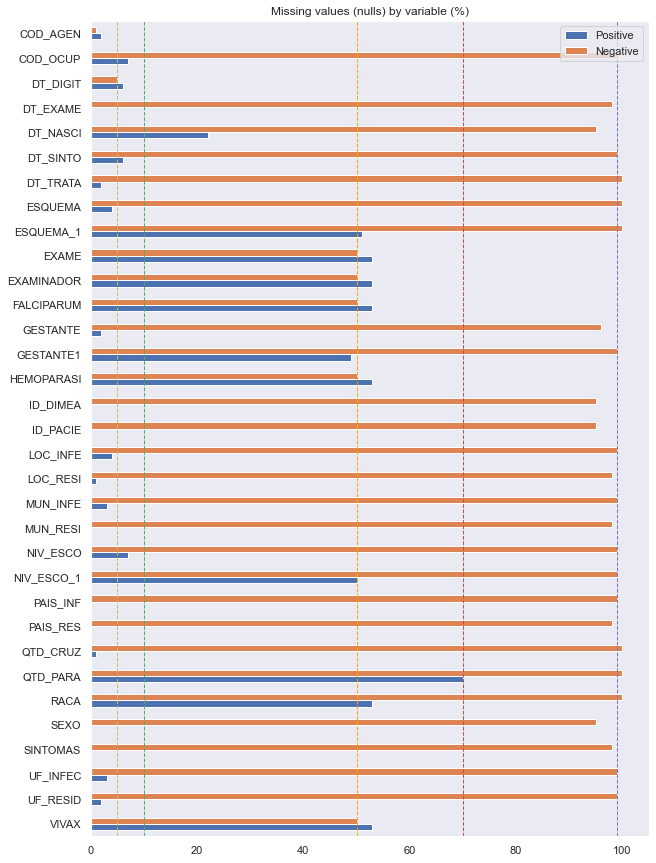

In [ ]:
cols = ['VIVAX',
        'UF_RESID',
        'UF_INFEC',
        'SINTOMAS',
        'SEXO',
        'RACA',
        'QTD_PARA',
        'QTD_CRUZ',
        'PAIS_RES',
        'PAIS_INF',
        'NIV_ESCO_1',
        'NIV_ESCO',
        'MUN_RESI',
        'MUN_INFE',
        'LOC_RESI',
        'LOC_INFE',
        'ID_PACIE',
        'ID_DIMEA',
        'HEMOPARASI',
        'GESTANTE1',
        'GESTANTE',
        'FALCIPARUM',
        'EXAMINADOR',
        'EXAME',
        'ESQUEMA_1',
        'ESQUEMA',
        'DT_TRATA',
        'DT_SINTO',
        'DT_NASCI',
        'DT_EXAME',
        'DT_DIGIT',
        'COD_OCUP',
        'COD_AGEN']

dfAux1 = round((dfPositive[cols].isnull().sum())*100/dfPositive[cols].shape[0])
dfAux2 = round((dfNegative[cols].isnull().sum())*100/dfNegative[cols].shape[0])

dfAuxPlot = pd.DataFrame({'Positive': dfAux1, 'Negative': dfAux2})

# Fields with no problem
#dfAuxPlot = dfAuxPlot.drop('id')

a = dfAuxPlot.plot.barh(rot=0, figsize=(10,15), title='Missing values (nulls) by variable (%)')
a.axvline(5, color='y', linestyle='--', lw=1)
a.axvline(10, color='g', linestyle='--', lw=1)
a.axvline(50, color='orange', linestyle='--', lw=1)
a.axvline(70, color='r', linestyle='--', lw=1)
a.axvline(99, color='m', linestyle='--', lw=1)

plt.savefig("img/null_values_percentage.pdf", dpi=300, bbox_inches='tight', pad_inches=0.5)


print('Describe nulls....')

# Release memory
#del dfAux1
#del dfAux2
#del dfAuxPlot

In [ ]:
dfPositiveCut = dfPositive[dfPositive['year_notif'] > 2012]
dfNegativeCut = dfNegative[dfNegative['year_notif'] > 2012]

dfAux1 = round((dfPositiveCut.isnull().sum())*100/dfPositiveCut.shape[0])
dfAux2 = round((dfNegativeCut.isnull().sum())*100/dfNegativeCut.shape[0])

dfAuxPlot = pd.DataFrame({'Positive': dfAux1, 'Negative': dfAux2})

# Fields with no problem
#dfAuxPlot = dfAuxPlot.drop('id')

a = dfAuxPlot.plot.barh(rot=0, figsize=(10,20), title='Missing values (nulls) by variable (%)')
a.axvline(5, color='y', linestyle='--', lw=1)
a.axvline(10, color='g', linestyle='--', lw=1)
a.axvline(50, color='orange', linestyle='--', lw=1)
a.axvline(70, color='r', linestyle='--', lw=1)
a.axvline(99, color='m', linestyle='--', lw=1)


#plt.savefig("img/null_values_percentage.pdf", dpi=300, bbox_inches='tight', pad_inches=0.5)


print('Describe nulls....')

# Release memory
#del dfAux1
#del dfAux2
#del dfAuxPlot

### Approach for dealing with missing values
- Fields maternal_age and newborn_weight represents less 1% of total sample, so they were removed.
- Fields cd_apgar1, cd_apgar5, num_live_births, num_fetal_losses represents around 10% or less, so they were also removed.
- For categorical fields having the category '9 - Ignored/Missing', records having null values on this fields were considered as 'Ignored' category, once this approach does not impact data domain representation.
- After we still have some fields with around 50% of null values.

In [ ]:
# Removing fields having null values in less than 1%
dfAux = df.copy()

dfAux = dfAux[dfAux['maternal_age'].notna()]
dfAux = dfAux[dfAux['newborn_weight'].notna()]

# Removing fields having null values in less than 13%
dfAux = dfAux[dfAux['cd_apgar1'].notna()]
dfAux = dfAux[dfAux['cd_apgar5'].notna()]
dfAux = dfAux[dfAux['num_live_births'].notna()]
dfAux = dfAux[dfAux['num_fetal_losses'].notna()]

# Set null fields as categorical Ignored (9).
# For this fields null and ignored have the same meaning and no impact.
dfAux['tp_maternal_schooling'] = dfAux['tp_maternal_schooling'].fillna(9)
dfAux['tp_marital_status'] = dfAux['tp_marital_status'].fillna(9)
dfAux['tp_maternal_race'] = dfAux['tp_maternal_race'].fillna(9)
dfAux['tp_pregnancy'] = dfAux['tp_pregnancy'].fillna(9)
dfAux['has_congenital_malformation'] = dfAux['has_congenital_malformation'].fillna(9)
dfAux['tp_labor'] = dfAux['tp_labor'].fillna(9)
dfAux['tp_newborn_presentation'] = dfAux['tp_newborn_presentation'].fillna(9)
dfAux['was_cesarean_before_labor'] = dfAux['was_cesarean_before_labor'].fillna(9)
dfAux['was_labor_induced'] = dfAux['was_labor_induced'].fillna(9)
dfAux['tp_childbirth_care'] = dfAux['tp_childbirth_care'].fillna(9)

# PreProcessed Dataframe copy
dfCutting = dfAux.copy()
dfCuttingAlive = dfCutting[dfCutting['is_neonatal_death'] == 0]
dfCuttingDeath = dfCutting[dfCutting['is_neonatal_death'] == 1]

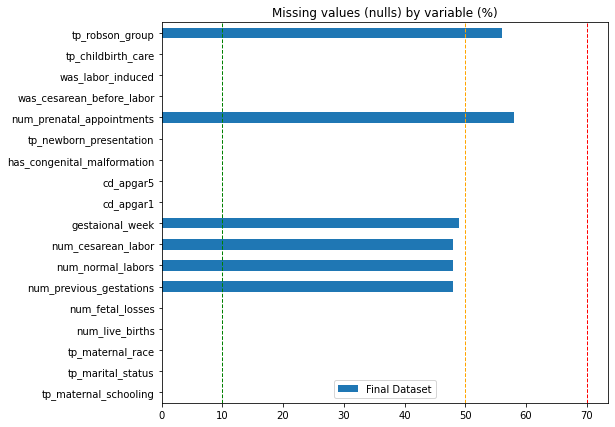

In [ ]:
# Recalculation nulls for the dataset
dfAux1 = round((dfCutting.isnull().sum())*100/dfCutting.shape[0])

dfAuxPlot = pd.DataFrame({'Final Dataset': dfAux1})

# Fields with no problem
dfAuxPlot = dfAuxPlot.drop('id')
dfAuxPlot = dfAuxPlot.drop('uf')
dfAuxPlot = dfAuxPlot.drop('birth_year')
dfAuxPlot = dfAuxPlot.drop('death_date')
dfAuxPlot = dfAuxPlot.drop('birth_date')
dfAuxPlot = dfAuxPlot.drop('is_neonatal_death')
dfAuxPlot = dfAuxPlot.drop('maternal_age')
dfAuxPlot = dfAuxPlot.drop('tp_labor')
dfAuxPlot = dfAuxPlot.drop('newborn_weight')
dfAuxPlot = dfAuxPlot.drop('tp_pregnancy')

a = dfAuxPlot.plot.barh(rot=0, figsize=(8,7), title='Missing values (nulls) by variable (%)')

a.axvline(10, color='green', linestyle='--', lw=1)
a.axvline(50, color='orange', linestyle='--', lw=1)
a.axvline(70, color='r', linestyle='--', lw=1)

plt.savefig("img/null_values_after_10_percent_removal.pdf", dpi=300, bbox_inches='tight', pad_inches=0.5)

# Release memory
try: del dfAux
except: False

try: del dfAuxPlot
except: False

try: del dfAux1
except: False

### Resultant dataset (after missing dealing)
- No relevant diference on class distribution;
- After this preprocessing, 15% of the original dataset were discarded.

-- Before --
Dataset size:  28,873,820
Survivors:  28,701,049
Neonatal deaths:  172,771

-- After --
Dataset size:  24,595,432
Survivors:  Survivors: 24,451,594
Neonatal deaths:  Deaths: 143,838


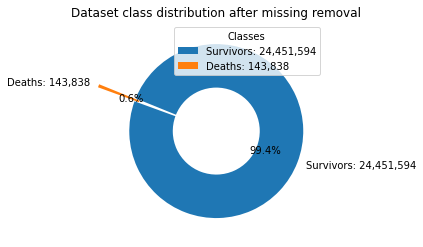

In [ ]:
print('-- Before --')
print("Dataset size: ", str('{:,}'.format(df.shape[0])))
print("Survivors: ", str('{:,}'.format(dfAlive.shape[0])))
print("Neonatal deaths: ", str('{:,}'.format(dfDeath.shape[0])))

survivors = 'Survivors: ' + str('{:,}'.format(dfCuttingAlive.shape[0]))
deaths = 'Deaths: ' + str('{:,}'.format(dfCuttingDeath.shape[0]))

print('\n-- After --')
print("Dataset size: ", str('{:,}'.format(dfCutting.shape[0])))
print("Survivors: ", survivors)
print("Neonatal deaths: ", deaths)

dfPlot = pd.DataFrame({'': [dfCuttingAlive.shape[0], dfCuttingDeath.shape[0]]}, index=[survivors, deaths])

ax = dfPlot.plot.pie(y='', figsize=(4, 4), title='Dataset class distribution after missing removal',
                     explode=[0,.45], startangle=160, radius=1,
                     wedgeprops=dict(width=0.5), autopct='%1.1f%%')

ax.legend(title="Classes", loc="best")

plt.savefig("img/dataset_class_distr_after_missing_removal.pdf", dpi=300, bbox_inches='tight', pad_inches=0.5)

del dfPlot

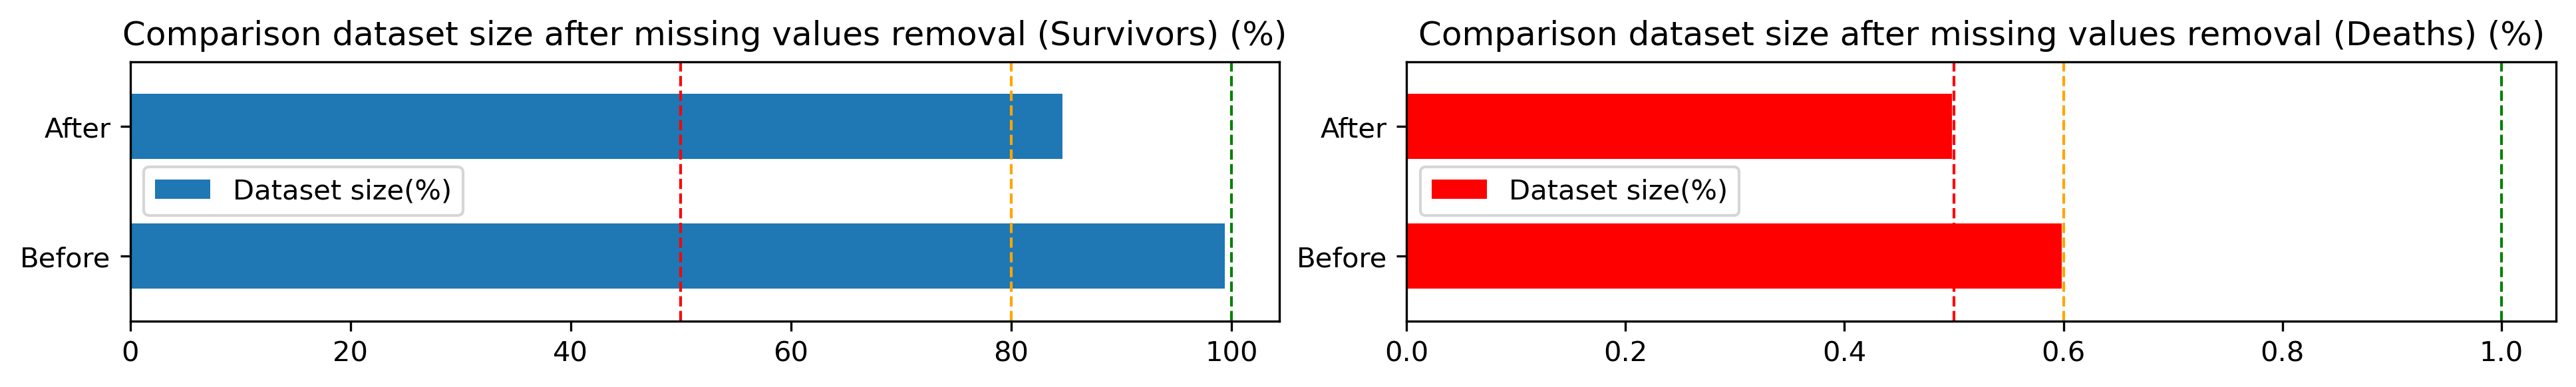

In [ ]:
fig, a = plt.subplots(1, 2, figsize=(13,2), dpi=300)
fig.tight_layout(pad=1.5)

# Alive sample on axis a[0]
data = {'Dataset size(%)':  [100*dfAlive.shape[0]/df.shape[0], 100*dfCuttingAlive.shape[0]/df.shape[0]]}
dfAuxPlot = pd.DataFrame(data, columns = ['Dataset size(%)'], index=['Before','After'])
dfAuxPlot.plot.barh(rot=0,  ax=a[0], title='Comparison dataset size after missing values removal (Survivors) (%)')

a[0].axvline(100, color='green', linestyle='--', lw=1)
a[0].axvline(80, color='orange', linestyle='--', lw=1)
a[0].axvline(50, color='r', linestyle='--', lw=1)

# Death sample on axis a[1]
data = {'Dataset size(%)':  [100*dfDeath.shape[0]/df.shape[0], 100*dfCuttingDeath.shape[0]/df.shape[0]]}
dfAuxPlot = pd.DataFrame (data, columns = ['Dataset size(%)'], index=['Before','After'])
dfAuxPlot.plot.barh(rot=0,  ax=a[1], color='r', title='Comparison dataset size after missing values removal (Deaths) (%)')

a[1].axvline(1, color='green', linestyle='--', lw=1)
a[1].axvline(0.6, color='orange', linestyle='--', lw=1)
a[1].axvline(0.5, color='r', linestyle='--', lw=1)

plt.savefig("img/dataset_size_after_missing_removal.pdf", dpi=300, bbox_inches='tight', pad_inches=0.5)

del dfAuxPlot, data


### Dataset distribution by years 2006-2016
- We have observed no concerns about distribuiton by years, consedering data colletion aspect.

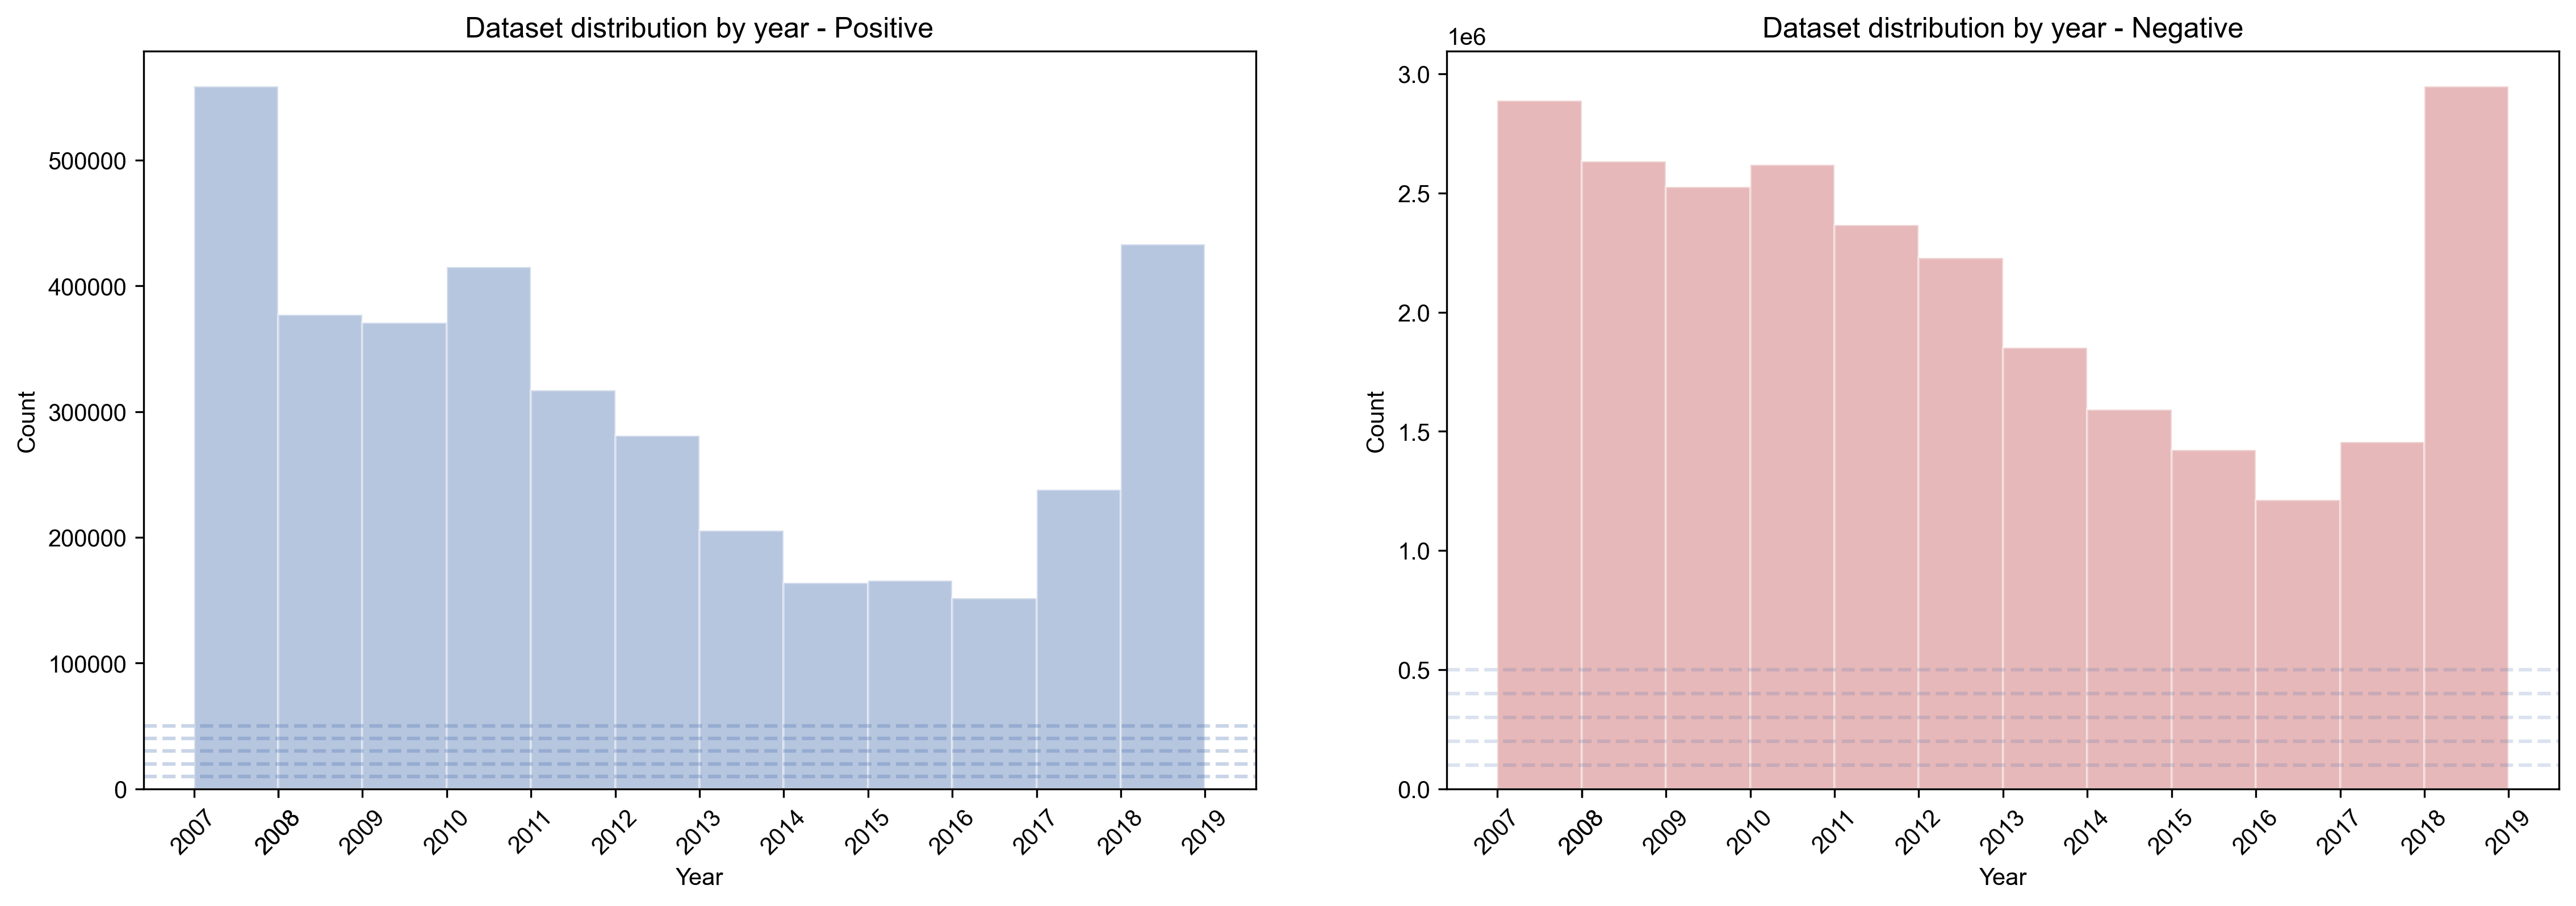

In [ ]:
fig, a = plt.subplots(1, 2, figsize=(16,6), dpi=300)
fig.tight_layout(pad=5)
sns.set(style="dark", color_codes=True)

# Survivors
sns.distplot(dfPositive[['year_notif']], ax=a[0], kde=False, bins=12, color="b")
a[0].title.set_text('Dataset distribution by year - Positive')
a[0].set(ylabel='Count')
a[0].set(xlabel='Year')
a[0].set(xticks=[2007,2008,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
a[0].set_xticklabels(a[0].get_xticks(), rotation=45, horizontalalignment='center')
a[0].axhline(100000, ls='--', alpha=.3)
a[0].axhline(200000, ls='--', alpha=.3)
a[0].axhline(300000, ls='--', alpha=.3)
a[0].axhline(400000, ls='--', alpha=.3)
a[0].axhline(500000, ls='--', alpha=.3)

# Deaths
sns.distplot(dfNegative[['year_notif']], ax=a[1], kde=False, bins=12, color="r")
a[1].title.set_text('Dataset distribution by year - Negative')
a[1].set(ylabel='Count')
a[1].set(xlabel='Year')
a[1].set(xticks=[2007,2008,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
a[1].set_xticklabels(a[1].get_xticks(), rotation=45, horizontalalignment='center')
a[1].axhline(1000000, ls='--', alpha=.2)
a[1].axhline(2000000, ls='--', alpha=.2)
a[1].axhline(3000000, ls='--', alpha=.2)
a[1].axhline(4000000, ls='--', alpha=.2)
a[1].axhline(5000000, ls='--', alpha=.2)

plt.savefig("img/year_distplot.png", dpi=300, bbox_inches='tight',pad_inches=0.5)


### Removing all NAs and cutting dataframe to period 2014 - 2016

The fields 'num_prenatal_appointments', 'num_previous_gestations', 'num_normal_labors', 'num_cesarean_labor', 'gestaional_week', 'tp_robson_group', were not captured before 2010, and has a lack on 2013, so, for this paper it were decided to use the data from 2014, 2015 and 2016 years only, were we have a better data quality, and with this we will became with a dataset having no null values.
- Removing indiviudals having missing on these variables

In [ ]:
dfCutting = dfCutting[dfCutting['num_prenatal_appointments'].notna()]
dfCutting = dfCutting[dfCutting['num_previous_gestations'].notna()]
dfCutting = dfCutting[dfCutting['num_normal_labors'].notna()]
dfCutting = dfCutting[dfCutting['num_cesarean_labor'].notna()]
dfCutting = dfCutting[dfCutting['gestaional_week'].notna()]
dfCutting = dfCutting[dfCutting['tp_robson_group'].notna()]

# Sobreviventes
dfCuttingAlive = dfCutting[dfCutting['is_neonatal_death'] == 0]

# Mortes Neonatais
dfCuttingDeath = dfCutting[dfCutting['is_neonatal_death'] == 1]

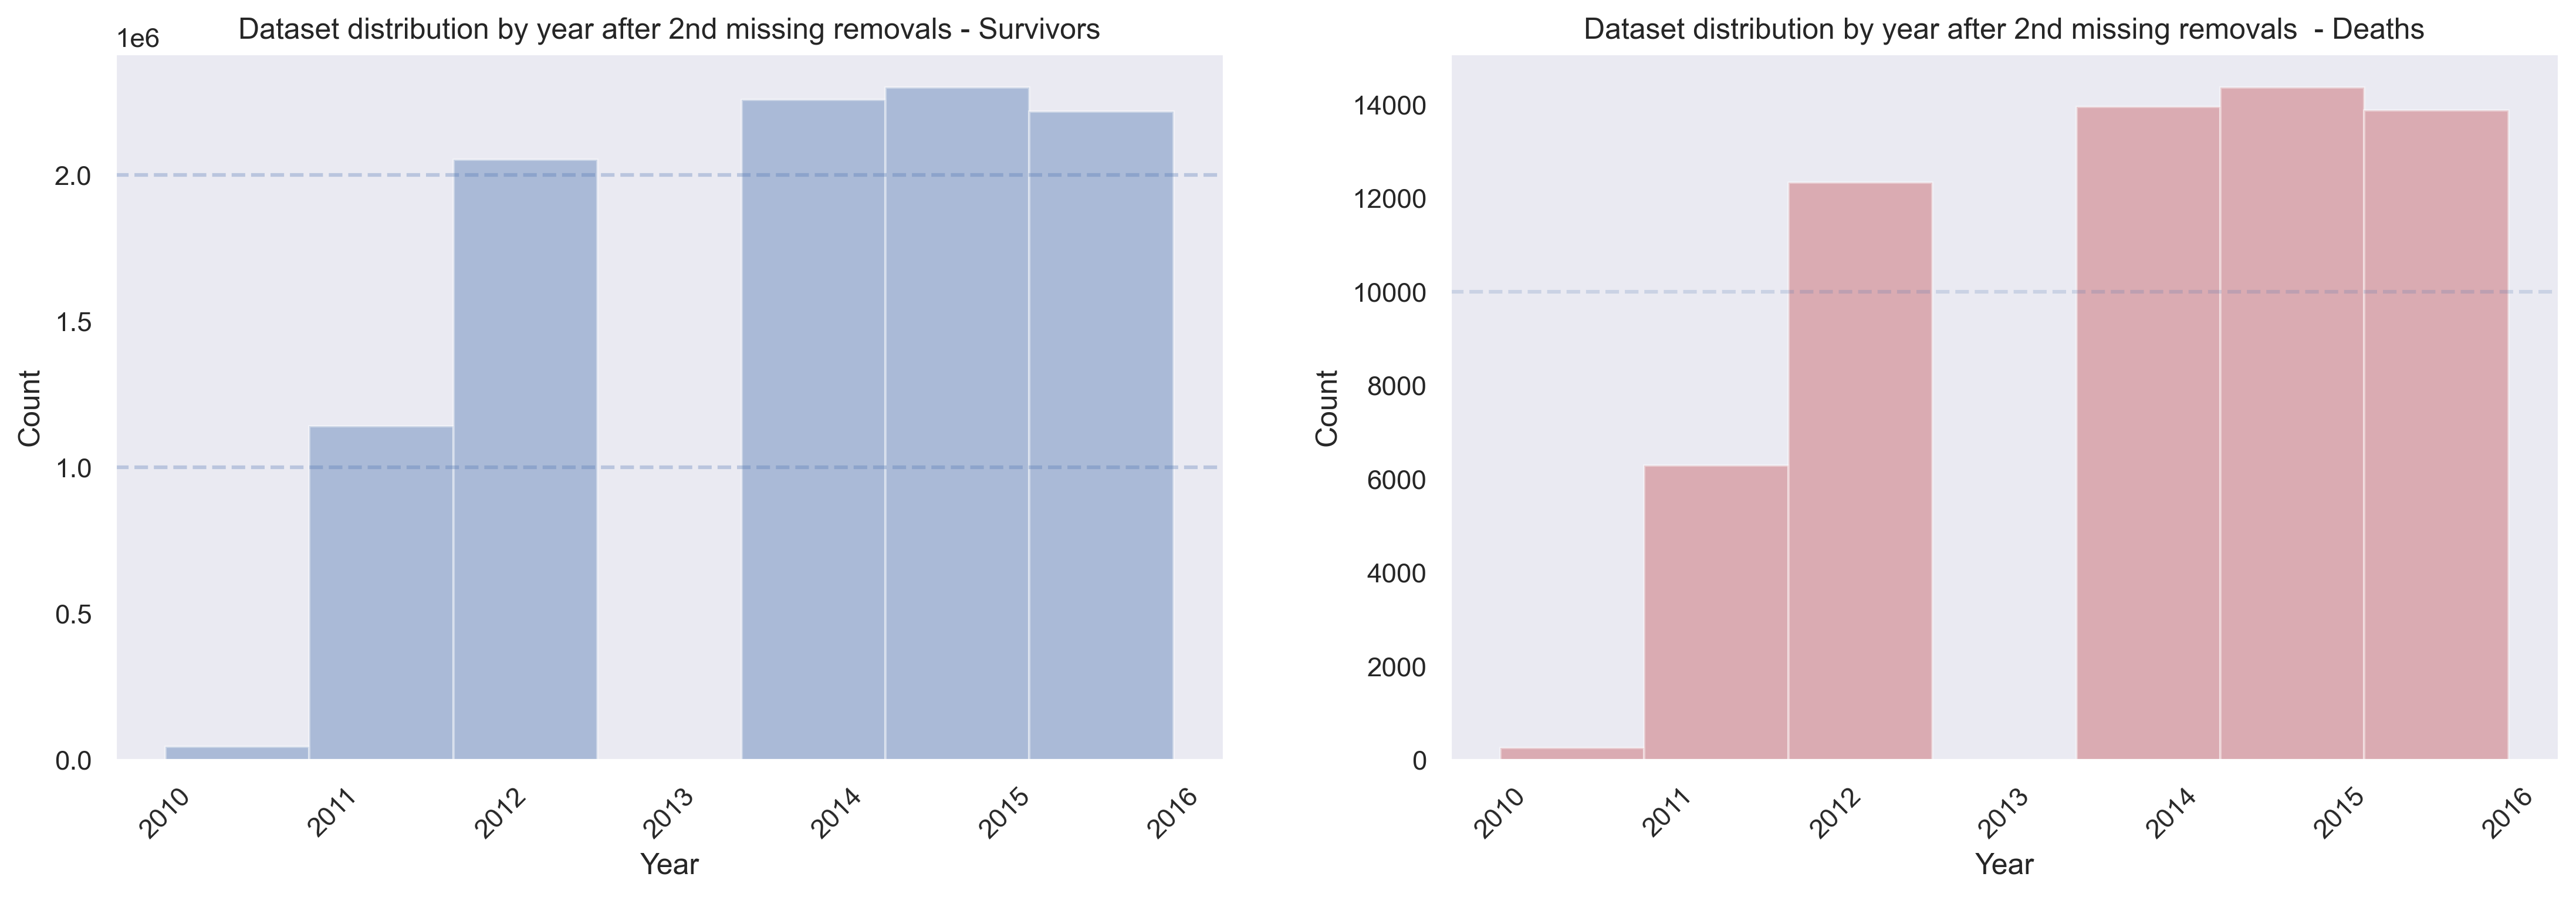

In [ ]:
fig, a = plt.subplots(1, 2, figsize=(16,6), dpi=300)
fig.tight_layout(pad=5)

sns.set(style="dark", color_codes=True)

# Sobreviventes
sns.distplot(dfCuttingAlive[['birth_year']], ax=a[0], kde=False, bins=7, color="b")
a[0].title.set_text('Dataset distribution by year after 2nd missing removals - Survivors')
a[0].set(ylabel='Count')
a[0].set(xlabel='Year')
a[0].set(xticks=[2010,2011,2012,2013,2014,2015,2016])
a[0].set_xticklabels(a[0].get_xticks(), rotation=45, horizontalalignment='center')
a[0].axhline(1000000, ls='--', alpha=.3)
a[0].axhline(2000000, ls='--', alpha=.3)

# Mortes Neonatais
sns.distplot(dfCuttingDeath[['birth_year']], ax=a[1], kde=False, bins=7, color="r")
a[1].title.set_text('Dataset distribution by year after 2nd missing removals  - Deaths')
a[1].set(ylabel='Count')
a[1].set(xlabel='Year')
a[1].set(xticks=[2010,2011,2012,2013,2014,2015,2016])
a[1].set_xticklabels(a[1].get_xticks(), rotation=45, horizontalalignment='center')
a[1].axhline(10000, ls='--', alpha=.2)

plt.savefig("img/year_distplot_after_all_null_removals.pdf", dpi=300, bbox_inches='tight',pad_inches=0.5)


### CSV/Pickle exports - Cutting to period 2014-2016

In [ ]:
# Reset index
dfCutting.sort_values(by=['is_neonatal_death','birth_date','death_date'], inplace=True)
dfCutting.reset_index(inplace=True)
dfCutting.drop('index', axis=1, inplace=True)

# Cuttting
dfFinal = dfCutting[dfCutting['birth_year'] >= 2014].copy()
dfAliveFinal = dfFinal[dfFinal['is_neonatal_death'] == 0].copy()
dfDeathFinal = dfFinal[dfFinal['is_neonatal_death'] == 1].copy()

print('-- Original Dataset --')
print("Dataset size: ", df.shape[0])
print("Survivors: ", dfAlive.shape[0])
print("Neonatal deaths: ", dfDeath.shape[0])

print('\n-- Final Dataset --')
print("Dataset size: ", dfFinal.shape[0])
print("Survivors: ", dfDeathFinal.shape[0])
print("Neonatal deaths: ", dfAliveFinal.shape[0])

# Export entire dataset
dfCutting.to_pickle("data/brneodeath_preprocessed.pkl")
dfCutting.to_csv("csv/brneodeath_preprocessed.csv")

# Period: 2010-2012
dfCutting[(dfCutting['birth_year'] >= 2010) & (dfCutting['birth_year'] <= 2012)].to_pickle("data/brneodeath_2012.pkl")
dfCutting[(dfCutting['birth_year'] >= 2010) & (dfCutting['birth_year'] <= 2012)].to_csv("csv/brneodeath_2012.csv")

# Period: 2014-2016
dfFinal.to_pickle("data/brneodeath_2014_2016_draft.pkl")
dfFinal.to_csv("csv/brneodeath_2014_2016_draft.csv")

# Release memory
del dfCutting

-- Original Dataset --
Dataset size:  28873820
Survivors:  28701049
Neonatal deaths:  172771

-- Final Dataset --
Dataset size:  6813938
Survivors:  42183
Neonatal deaths:  6771755


### Final dataset size after missing removal and cutting the sample for years 2014, 2015 and 2016

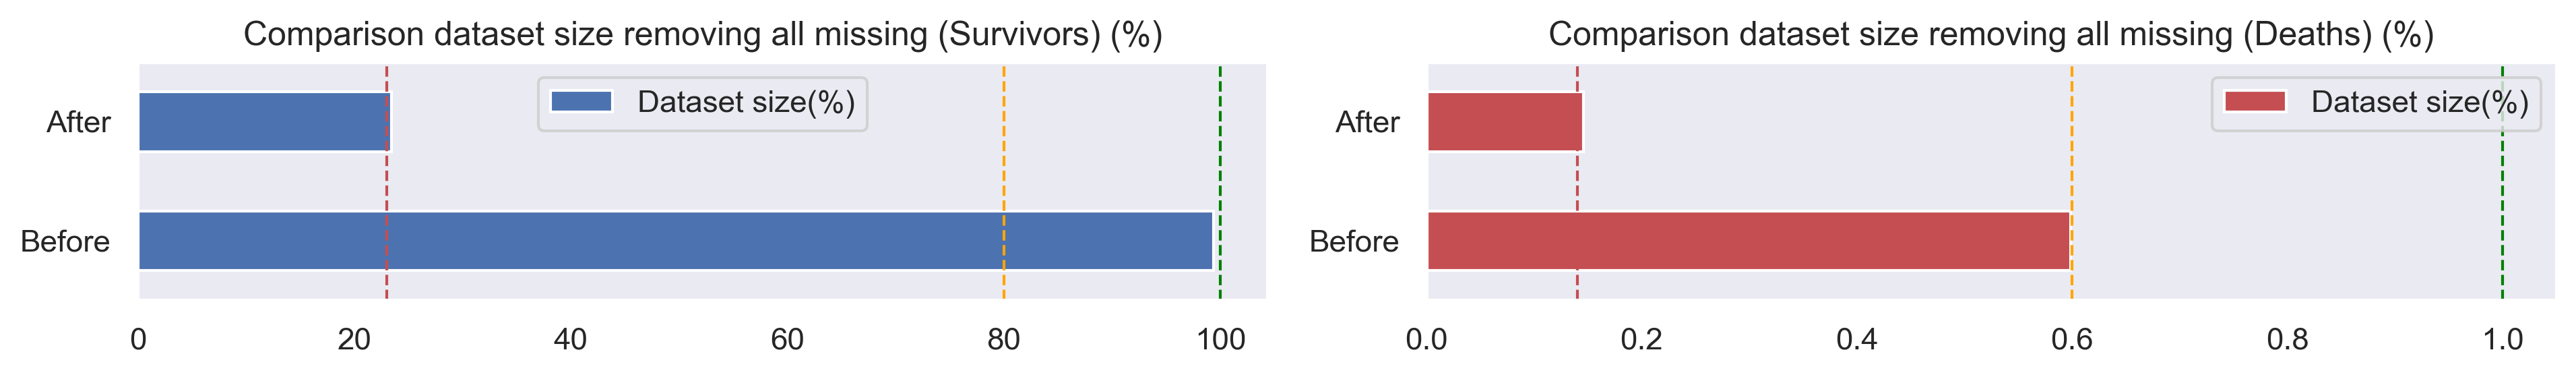

In [ ]:
fig, a = plt.subplots(1, 2, figsize=(13,2), dpi=300)
fig.tight_layout(pad=1.5)

dfAliveSize = dfAliveFinal.shape[0]
dfDeathSize = dfDeathFinal.shape[0]

# Alive sample
data = {'Dataset size(%)':  [100*dfAlive.shape[0]/df.shape[0], 100*dfAliveSize/df.shape[0]]}
dfAuxPlot = pd.DataFrame (data, columns = ['Dataset size(%)'], index=['Before','After'])
dfAuxPlot.plot.barh(rot=0,  ax=a[0], title='Comparison dataset size removing all missing (Survivors) (%)')

a[0].axvline(100, color='green', linestyle='--', lw=1)
a[0].axvline(80, color='orange', linestyle='--', lw=1)
a[0].axvline(23, color='r', linestyle='--', lw=1)

# Death sample
data = {'Dataset size(%)':  [100*dfDeath.shape[0]/df.shape[0], 100*dfDeathSize/df.shape[0]]}
dfAuxPlot = pd.DataFrame (data, columns = ['Dataset size(%)'], index=['Before','After'])
dfAuxPlot.plot.barh(rot=0,  ax=a[1], color='r', title='Comparison dataset size removing all missing (Deaths) (%)')

a[1].axvline(1, color='green', linestyle='--', lw=1)
a[1].axvline(0.6, color='orange', linestyle='--', lw=1)
a[1].axvline(0.14, color='r', linestyle='--', lw=1)

plt.savefig("img/final_dataset_sample_size_percent.pdf", dpi=300, bbox_inches='tight', pad_inches=0.5)


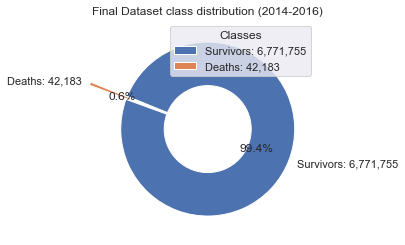

In [ ]:
survivors = 'Survivors: ' + str('{:,}'.format(dfAliveFinal.shape[0]))
deaths = 'Deaths: ' + str('{:,}'.format(dfDeathFinal.shape[0]))

dfPlot = pd.DataFrame({'': [dfAliveFinal.shape[0], dfDeathFinal.shape[0]]}, index=[survivors, deaths])

ax = dfPlot.plot.pie(y='', figsize=(4, 4), title='Final Dataset class distribution (2014-2016)',
    explode=[0,.45], startangle=160, radius=1, wedgeprops=dict(width=0.5), autopct='%1.1f%%')

ax.legend(title="Classes", loc="best")

plt.savefig("img/final_dataset_class_distr.pdf", dpi=300, bbox_inches='tight', pad_inches=0.5)

del dfPlot

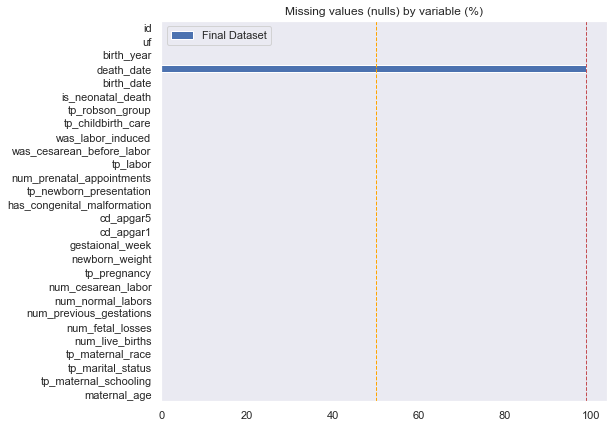

In [ ]:
# Recalculation nulls for the dataset
dfAux1 = round((dfFinal.isnull().sum())*100/dfFinal.shape[0])

dfAuxPlot = pd.DataFrame({'Final Dataset': dfAux1})

a = dfAuxPlot.plot.barh(rot=0, figsize=(8,7), title='Missing values (nulls) by variable (%)')

#a.axvline(10, color='green', linestyle='--', lw=1)
a.axvline(50, color='orange', linestyle='--', lw=1)
a.axvline(99, color='r', linestyle='--', lw=1)

plt.savefig("img/null_values_final_dataset.png", dpi=300, bbox_inches='tight', pad_inches=0.5)

# Release memory
del dfAuxPlot
del dfAux1

### Datatype casting and outliers removal
- Outliers excludes less than 0,8% of alive individuas, and 2,7% of deaths.

In [ ]:
dfAux = dfFinal.copy()

# Datatype casting
dfAux[["birth_date","death_date"]] = dfAux[["birth_date","death_date"]].apply(pd.to_datetime)

for col in ['maternal_age',
            'tp_maternal_schooling',
            'tp_marital_status',
            'tp_maternal_race',
            'num_live_births',
            'num_fetal_losses',
            'num_previous_gestations',
            'num_normal_labors',
            'num_cesarean_labor',
            'tp_pregnancy',
            'newborn_weight',
            'gestaional_week',
            'cd_apgar1',
            'cd_apgar5',
            'has_congenital_malformation',
            'tp_newborn_presentation',
            'num_prenatal_appointments',
            'tp_labor',
            'was_cesarean_before_labor',
            'was_labor_induced',
            'tp_childbirth_care',
            'tp_robson_group',
            'is_neonatal_death',
            'birth_year']:
    try:
        dfAux[col] = dfAux[col].astype(int)
    except:
        dfAux[col] = dfAux[col].astype(float).astype(int)

# Outlier removals
dfAux = dfAux[dfAux['num_live_births'] <= 10]
dfAux = dfAux[dfAux['num_fetal_losses'] <= 5]
dfAux = dfAux[dfAux['num_previous_gestations'] <= 10]
dfAux = dfAux[dfAux['num_normal_labors'] <= 10]
dfAux = dfAux[dfAux['num_cesarean_labor'] <= 6]
dfAux = dfAux[dfAux['cd_apgar1'] <= 10]
dfAux = dfAux[dfAux['cd_apgar5'] <= 10]
dfAux = dfAux[dfAux['newborn_weight'] <= 6000]
dfAux = dfAux[dfAux['num_prenatal_appointments'] <= 40]

dfAux = dfAux[dfAux['maternal_age'] <= 55]

# Reindex
dfAux.sort_values(by=['is_neonatal_death','birth_date','death_date'], inplace=True)
dfAux.reset_index(inplace=True)
dfAux.drop('index', axis=1, inplace=True)

dfAlive1 = dfAux[dfAux['is_neonatal_death'] == 0]
dfDeath1 = dfAux[dfAux['is_neonatal_death'] == 1]

print('-- Before --')
print("Dataset size: ", str('{:,}'.format(dfFinal.shape[0])))
print("Survivors: ", str('{:,}'.format(dfAliveFinal.shape[0])))
print("Neonatal deaths: ", str('{:,}'.format(dfDeathFinal.shape[0])))

print('\n-- After --')
print("Dataset size: ", str('{:,}'.format(dfAux.shape[0])))
print("Survivors: ", str('{:,}'.format(dfAlive1.shape[0])))
print("Neonatal deaths: ", str('{:,}'.format(dfDeath1.shape[0])))

print('\n-- Discard percentage --')
print('Survivors (%):', round(100-(dfAlive1.shape[0]/dfAliveFinal.shape[0])*100,2))
print('Neonatal deaths (%):', round(100-(dfDeath1.shape[0]/dfDeathFinal.shape[0])*100,2))


-- Before --
Dataset size:  6,813,938
Survivors:  6,771,755
Neonatal deaths:  42,183

-- After --
Dataset size:  6,760,222
Survivors:  6,719,191
Neonatal deaths:  41,031

-- Discard percentage --
Survivors (%): 0.78
Neonatal deaths (%): 2.73


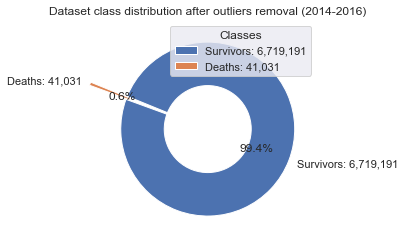

In [ ]:
survivors = 'Survivors: ' + str('{:,}'.format(dfAlive1.shape[0]))
deaths = 'Deaths: ' + str('{:,}'.format(dfDeath1.shape[0]))

dfPlot = pd.DataFrame({'': [dfAlive1.shape[0], dfDeath1.shape[0]]},
                  index=[survivors, deaths])


ax = dfPlot.plot.pie(y='', figsize=(4, 4), title='Dataset class distribution after outliers removal (2014-2016)',
    explode=[0,.45], startangle=160, radius=1,
    wedgeprops=dict(width=0.5), autopct='%1.1f%%')

ax.legend(title="Classes", loc="best")

plt.savefig("img/final_dataset_class_distr_outliers_removal.pdf", dpi=300, bbox_inches='tight', pad_inches=0.5)

del dfPlot

### CSV/Pickle exports - Final dataset

In [ ]:
dfFinal = dfAux.copy()
dfAliveFinal = dfAlive1.copy()
dfDeathFinal = dfDeath1.copy()

dfFinal.to_pickle("data/brneodeath_2014_2016.pkl")
dfFinal.to_csv("csv/brneodeath_2014_2016.csv")

# 2014
dfFinal[dfFinal['birth_year'] == 2014].to_pickle("data/brneodeath_2014.pkl")
dfFinal[dfFinal['birth_year'] == 2014].to_csv("csv/brneodeath_2014.csv")
# 2015
dfFinal[dfFinal['birth_year'] == 2015].to_pickle("data/brneodeath_2015.pkl")
dfFinal[dfFinal['birth_year'] == 2015].to_csv("csv/brneodeath_2015.csv")
# 2015
dfFinal[dfFinal['birth_year'] == 2016].to_pickle("data/brneodeath_2016.pkl")
dfFinal[dfFinal['birth_year'] == 2016].to_csv("csv/brneodeath_2016.csv")

# Alives 2014-2016
dfAliveFinal.to_pickle("data/brneodeath_2014_2016_alive.pkl")
dfAliveFinal.to_csv("csv/brneodeath_2014_2016_alive.csv")

# Deaths 2014-2016
dfDeathFinal.to_pickle("data/brneodeath_2014_2016_deaths.pkl")
dfDeathFinal.to_csv("csv/brneodeath_2014_2016_deaths.csv")

# Release memory
del dfAux, dfAlive1, dfDeath1


### Categorical counts

In [ ]:
fig, axs = plt.subplots(18, 2, figsize=(12,60), dpi=300)
fig.tight_layout(pad=3.0)

def add_graph(linha,coluna,p_dfAux,col,p_subtitle0,p_pallete):
    axs[linha,coluna].title.set_text(p_subtitle0)
    sns.countplot(y=col, data=p_dfAux, ax=axs[linha,coluna], palette=p_pallete, order=p_dfAux[col].value_counts().index)
    axs[linha,coluna].set(xlabel='Count')
    axs[linha,coluna].set(ylabel='Values')

i = 0
for col in ['tp_maternal_schooling', 'tp_marital_status',
            'tp_maternal_race', 'num_live_births', 'num_fetal_losses',
            'num_previous_gestations', 'num_normal_labors', 'num_cesarean_labor',
            'tp_pregnancy', 'cd_apgar1',
            'cd_apgar5', 'has_congenital_malformation', 'tp_newborn_presentation',
            'tp_labor', 'was_cesarean_before_labor',
            'was_labor_induced', 'tp_childbirth_care', 'tp_robson_group']:

    add_graph(i,0,dfAliveFinal,col,col, 'Blues_d')
    add_graph(i,1,dfDeathFinal,col,col, 'Reds_d')
    i = i + 1

### Dataset distribution by States

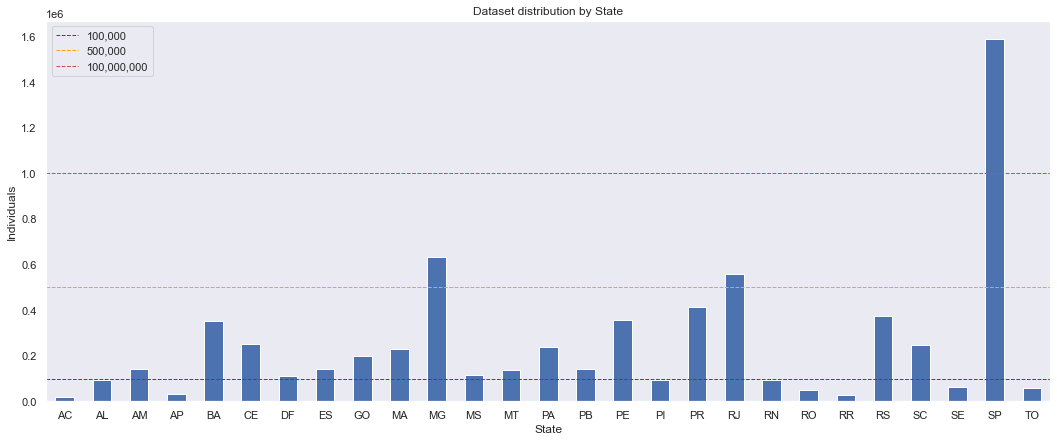

In [ ]:
dfAuxPlot = dfFinal[['id','uf']].groupby('uf').count()

dfAuxPlot.rename(columns={'id':'Individuals'}, inplace=True)

a = dfAuxPlot.plot.bar(rot=0, figsize=(18,7), title='Dataset distribution by State')

a.axhline(100000, color='green', linestyle='--', lw=1)
a.axhline(500000, color='orange', linestyle='--', lw=1)
a.axhline(1000000, color='r', linestyle='--', lw=1)

plt.legend(['100,000','500,000','100,000,000'])
plt.xlabel('State')
plt.ylabel('Individuals')
plt.savefig("img/dataset_distr_by_state.png", dpi=300, bbox_inches='tight', pad_inches=0.5)

/opt/anaconda3/envs/DM017/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


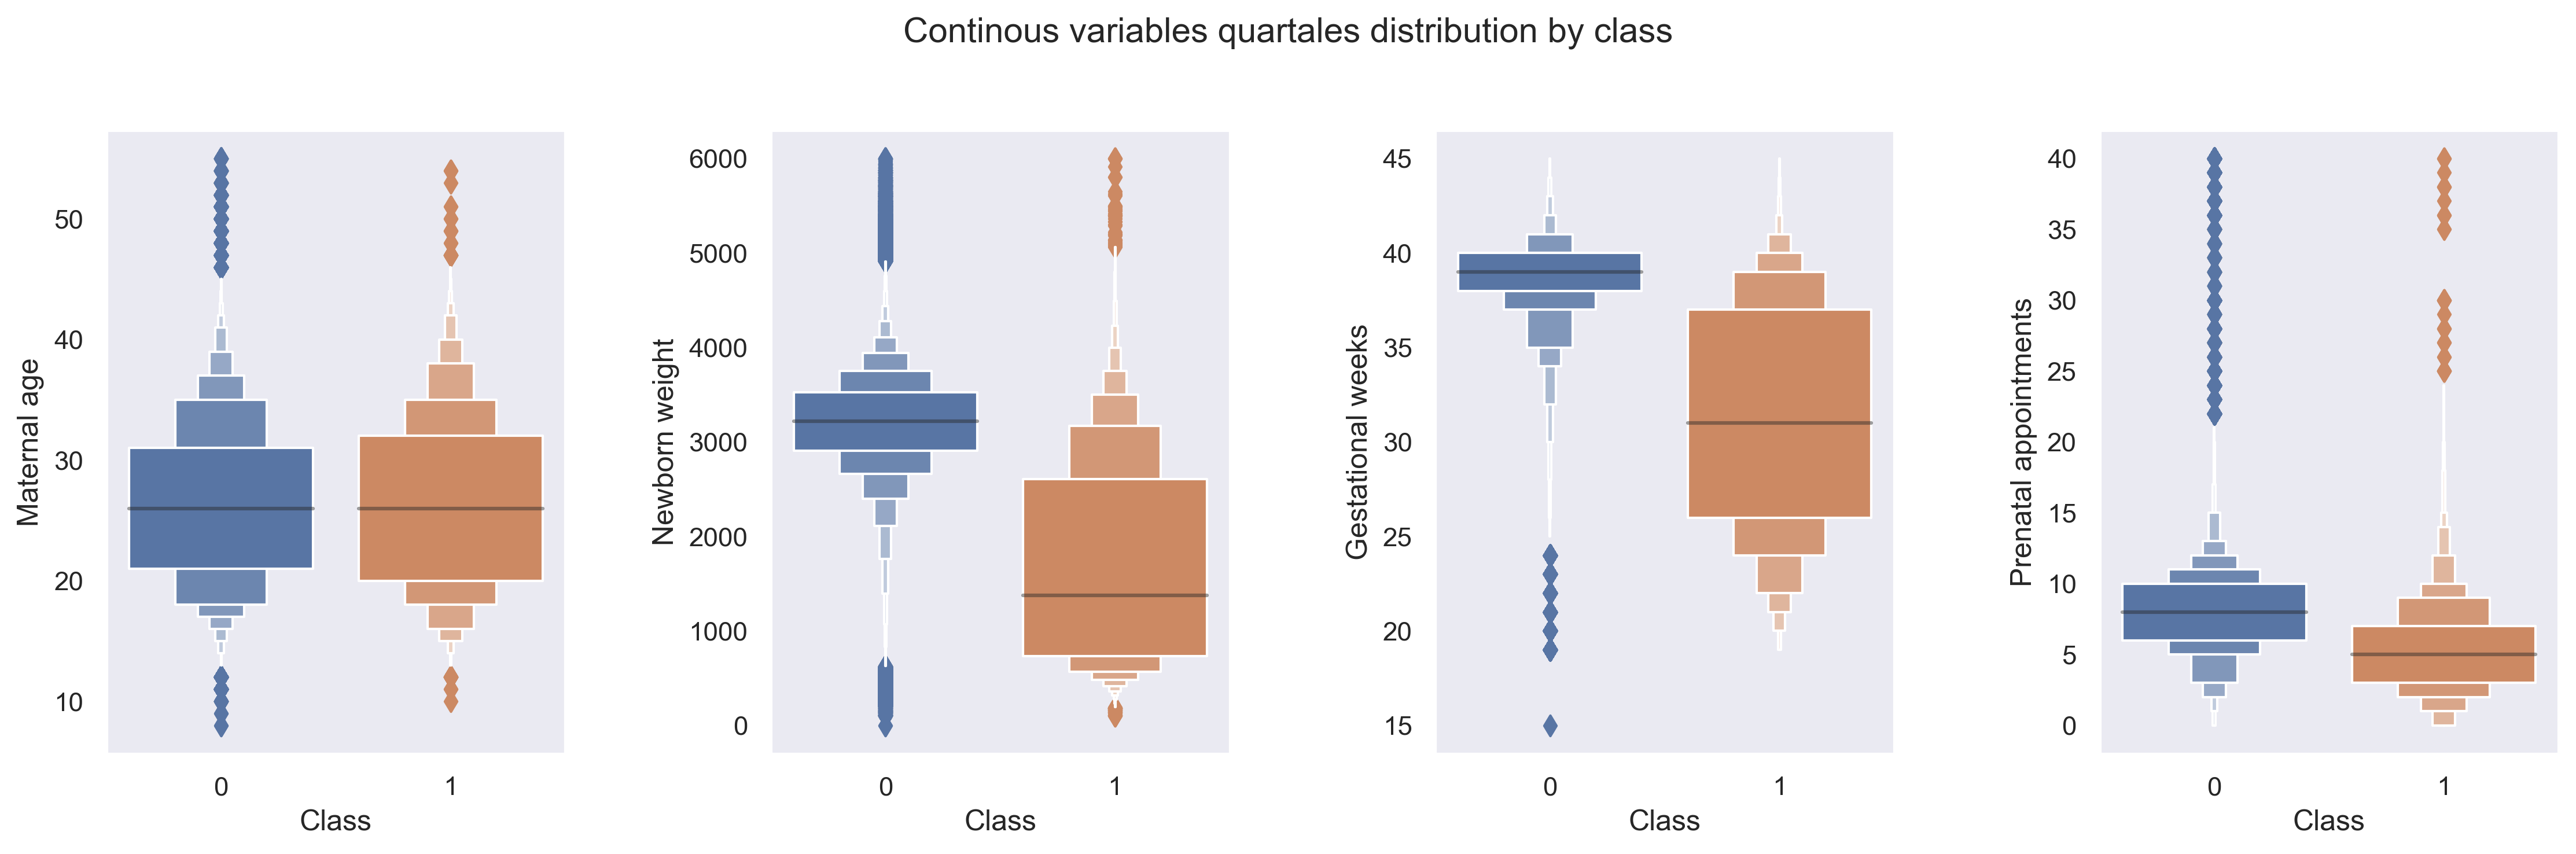

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15,5), dpi=300)

dfPlot = dfFinal[['maternal_age','newborn_weight','gestaional_week','num_prenatal_appointments','is_neonatal_death']]

dfPlot.rename(columns={'maternal_age':'Maternal age',
                       'newborn_weight':'Newborn weight',
                       'gestaional_week':'Gestational weeks',
                       'num_prenatal_appointments':'Prenatal appointments',
                       'is_neonatal_death':'Class'}, inplace=True)

sns.boxenplot(x='Class' , y='Maternal age', data=dfPlot, ax=axs[0]);
sns.boxenplot(x='Class' , y='Newborn weight', data=dfPlot, ax=axs[1]);
sns.boxenplot(x='Class' , y='Gestational weeks', data=dfPlot, ax=axs[2]);
sns.boxenplot(x='Class' , y='Prenatal appointments',data=dfPlot, ax=axs[3]);


fig.tight_layout(h_pad=3, w_pad=3)
plt.suptitle('Continous variables quartales distribution by class')
plt.subplots_adjust(top=0.85)

#plt.savefig('img/BRNeoDeath_quantitativa_continuous_features_quartales.pdf')
plt.show()

<a id='Descriptive_tables'></a>
### Descriptive tables export to CSV
[Home](#top)

In [ ]:
# Create table/describe.csv file
print('Data description - Final Dataset')
dfFinal.describe().round(2).to_csv("table/table_describe.csv")
dfFinal.describe().round(2)

Data description - Final Dataset


,maternal_age,tp_maternal_schooling,tp_marital_status,tp_maternal_race,num_live_births,num_fetal_losses,num_previous_gestations,num_normal_labors,num_cesarean_labor,tp_pregnancy,...,tp_newborn_presentation,num_prenatal_appointments,tp_labor,was_cesarean_before_labor,was_labor_induced,tp_childbirth_care,tp_robson_group,is_neonatal_death,birth_year,id
count,6760222.00,6760222.00,6760222.00,6760222.00,6760222.00,6760222.00,6760222.00,6760222.00,6760222.00,6760222.00,...,6760222.00,6760222.00,6760222.00,6760222.00,6760222.00,6760222.00,6760222.00,6760222.00,6760222.00,6760222.00
mean,26.40,4.00,2.35,2.89,0.94,0.22,1.14,0.64,0.33,1.03,...,1.15,7.81,1.57,4.15,2.09,3.72,4.01,0.01,2014.99,12231980.72
std,6.66,0.88,1.67,1.79,1.22,0.53,1.39,1.18,0.63,0.26,...,0.95,2.90,0.53,3.44,1.44,1.90,2.68,0.08,0.81,8788639.58
min,8.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,2014.00,185963.00
25%,21.00,4.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,6.00,1.00,1.00,2.00,2.00,2.00,0.00,2014.00,2801724.25
50%,26.00,4.00,2.00,4.00,1.00,0.00,1.00,0.00,0.00,1.00,...,1.00,8.00,2.00,2.00,2.00,5.00,3.00,0.00,2015.00,13120532.50
75%,31.00,4.00,2.00,4.00,1.00,0.00,2.00,1.00,1.00,1.00,...,1.00,10.00,2.00,9.00,2.00,5.00,5.00,0.00,2016.00,20446454.75
max,55.00,9.00,9.00,9.00,10.00,5.00,10.00,10.00,6.00,9.00,...,9.00,40.00,9.00,9.00,9.00,9.00,11.00,1.00,2016.00,26882708.00


In [ ]:
print('Data description - Final Dataset (Survivors sample)')
dfAliveFinal.describe().round(2).to_csv("table/table_describe_alive.csv")
dfAliveFinal.describe().round(2)

Data description - Final Dataset (Survivors sample)


,maternal_age,tp_maternal_schooling,tp_marital_status,tp_maternal_race,num_live_births,num_fetal_losses,num_previous_gestations,num_normal_labors,num_cesarean_labor,tp_pregnancy,...,tp_newborn_presentation,num_prenatal_appointments,tp_labor,was_cesarean_before_labor,was_labor_induced,tp_childbirth_care,tp_robson_group,is_neonatal_death,birth_year,id
count,6719191.00,6719191.00,6719191.00,6719191.00,6719191.00,6719191.00,6719191.00,6719191.00,6719191.00,6719191.00,...,6719191.00,6719191.00,6719191.00,6719191.00,6719191.00,6719191.00,6719191.00,6719191.0,6719191.00,6719191.00
mean,26.40,4.00,2.35,2.89,0.94,0.22,1.14,0.64,0.33,1.03,...,1.15,7.82,1.58,4.15,2.09,3.72,3.99,0.0,2014.99,12228910.92
std,6.66,0.88,1.67,1.79,1.22,0.53,1.39,1.18,0.63,0.25,...,0.95,2.89,0.53,3.44,1.44,1.90,2.66,0.0,0.81,8788575.91
min,8.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.0,2014.00,185963.00
25%,21.00,4.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,6.00,1.00,1.00,2.00,2.00,2.00,0.0,2014.00,2800576.50
50%,26.00,4.00,2.00,4.00,1.00,0.00,1.00,0.00,0.00,1.00,...,1.00,8.00,2.00,2.00,2.00,5.00,3.00,0.0,2015.00,13119328.00
75%,31.00,4.00,2.00,4.00,1.00,0.00,2.00,1.00,1.00,1.00,...,1.00,10.00,2.00,9.00,2.00,5.00,5.00,0.0,2016.00,20445708.50
max,55.00,9.00,9.00,9.00,10.00,5.00,10.00,10.00,6.00,9.00,...,9.00,40.00,9.00,9.00,9.00,9.00,11.00,0.0,2016.00,26882708.00


In [ ]:
print('Data description - Final Dataset (Deaths sample)')
dfDeathFinal.describe().round(2).to_csv("table/table_describe_death.csv")
dfDeathFinal.describe().round(2)

Data description - Final Dataset (Deaths sample)


,maternal_age,tp_maternal_schooling,tp_marital_status,tp_maternal_race,num_live_births,num_fetal_losses,num_previous_gestations,num_normal_labors,num_cesarean_labor,tp_pregnancy,...,tp_newborn_presentation,num_prenatal_appointments,tp_labor,was_cesarean_before_labor,was_labor_induced,tp_childbirth_care,tp_robson_group,is_neonatal_death,birth_year,id
count,41031.00,41031.00,41031.00,41031.00,41031.00,41031.00,41031.00,41031.00,41031.00,41031.00,...,41031.00,41031.00,41031.00,41031.00,41031.00,41031.00,41031.00,41031.0,41031.00,41031.00
mean,26.28,3.92,2.34,2.96,0.93,0.31,1.22,0.69,0.30,1.12,...,1.37,5.54,1.52,4.47,2.18,3.65,7.56,1.0,2015.00,12734688.51
std,7.20,0.90,1.72,1.80,1.32,0.66,1.55,1.27,0.64,0.42,...,1.24,3.21,0.54,3.50,1.44,1.93,3.01,0.0,0.81,8784705.60
min,10.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.0,2014.00,189320.00
25%,20.00,4.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,3.00,1.00,1.00,2.00,2.00,5.00,1.0,2014.00,3695188.00
50%,26.00,4.00,2.00,4.00,0.00,0.00,1.00,0.00,0.00,1.00,...,1.00,5.00,2.00,3.00,2.00,5.00,9.00,1.0,2015.00,13351062.00
75%,32.00,4.00,4.00,4.00,1.00,0.00,2.00,1.00,0.00,1.00,...,1.00,7.00,2.00,9.00,2.00,5.00,10.00,1.0,2016.00,20557456.00
max,54.00,9.00,9.00,9.00,10.00,5.00,10.00,10.00,6.00,9.00,...,9.00,40.00,9.00,9.00,9.00,9.00,11.00,1.0,2016.00,26882657.00


# Dataset preparation for Survival Analysis

In [ ]:
dfAux = dfFinal.copy()

enter_time = pd.to_datetime(dt.date(2014, 1, 1))
out_time = pd.to_datetime(dt.date(2016, 11, 30))

# Calculate number of days until death and fill column 'tempo'
dfAux['days'] = 29 # Neonatal Survivors
dfAux.loc[dfAux['is_neonatal_death'] == 1, 'days'] = ((dfAux.loc[dfAux['is_neonatal_death'] == 1, 'death_date'] -
      dfAux.loc[dfAux['is_neonatal_death'] == 1, 'birth_date']) / np.timedelta64(1, 'D')).astype(int)

dfAux['days'] = dfAux['days'].astype(int)
dfAux['enter_time'] = ((dfAux['birth_date'] - enter_time)/ np.timedelta64(1, 'D')).astype(int)
dfAux['out_time'] = (dfAux['enter_time'] + dfAux['days']).astype(int)

# Sorting and reindexing
dfAux.sort_values(by=['is_neonatal_death','enter_time'], inplace=True)
dfAux.reset_index(inplace=True)
dfAux.drop('index', axis=1, inplace=True)

# Export to CSV 3 sets os data
dfAux.to_csv('csv/BR.csv')
dfAux.to_pickle("data/BR.pkl")


In [ ]:
# Unit test
for index, row in dfAux[dfAux['is_neonatal_death'] == 0].head().iterrows():
    print(index, ':', row['enter_time'], '-', row['out_time'], '=', row['days'])

for index, row in dfAux[dfAux['is_neonatal_death'] == 0].tail().iterrows():
    print(index, ':', row['enter_time'], '-', row['out_time'], '=', row['days'])

0 : 0 - 29 = 29
1 : 0 - 29 = 29
2 : 0 - 29 = 29
3 : 0 - 29 = 29
4 : 0 - 29 = 29
6719186 : 1095 - 1124 = 29
6719187 : 1095 - 1124 = 29
6719188 : 1095 - 1124 = 29
6719189 : 1095 - 1124 = 29
6719190 : 1095 - 1124 = 29


[Home](#top)

In [ ]:
! jupyter nbconvert --to html --no-input BRNeoDeath_01_preprocessing.ipynb

[NbConvertApp] Converting notebook BRNeoDeath_01_preprocessing.ipynb to html
[NbConvertApp] Writing 2862022 bytes to BRNeoDeath_01_preprocessing.html
